### DBSCAN

In this notebook we will look at two examples. The first example is a dataset of different shapes with their (x,y) coordinates. We will first apply DBSCAN to cluster the shapes then plot on a 2-dimensional graph. The second example is a dataset of 12 variables. We will use principal component analysis to reduce to 2-dimensions and then plot in a 2-dimentional graph.

Learning objectives:
* DBSCAN
* Hyperparameter experimenting
* Dimension reduction 

Two examples:
* dataset 1: mltishapes from library(factoextra)
* dataset 2: wine from library(rattle.data)

In [19]:
#install.packages("fpc")
#install.packages("factoextra")
#install.packages("rattle.data")
#install.packages("dbscan")
library(dbscan)
library(fpc)
library(factoextra)
library(rattle.data)
library(dplyr)

#### Example 1

In [2]:
data("multishapes")
head(multishapes)
table(multishapes$shape)

x,y,shape
-0.8037393,-0.8530526,1
0.8528507,0.3676184,1
0.9271795,-0.2749024,1
-0.7526261,-0.5115652,1
0.7068462,0.8106792,1
1.0346985,0.3946550,1



  1   2   3   4   5   6 
400 400 100 100  50  50 

In [3]:
df <- multishapes[, 1:2]

In [4]:
db <- fpc::dbscan(df, eps = 0.15, MinPts = 5) 
    # You are encouraged to test other MinPts 1, 5, 50, 100
    # eps: you are encouraged to test other values 0.01, 0.15, 0.5, 0.99, 2.0
table(db$cluster,multishapes$shape)

   
      1   2   3   4   5   6
  0   2   0   0   2  27   0
  1 398   0   0   0  12   0
  2   0 400   0   0   5   0
  3   0   0 100   0   4   0
  4   0   0   0  98   1   0
  5   0   0   0   0   1  50

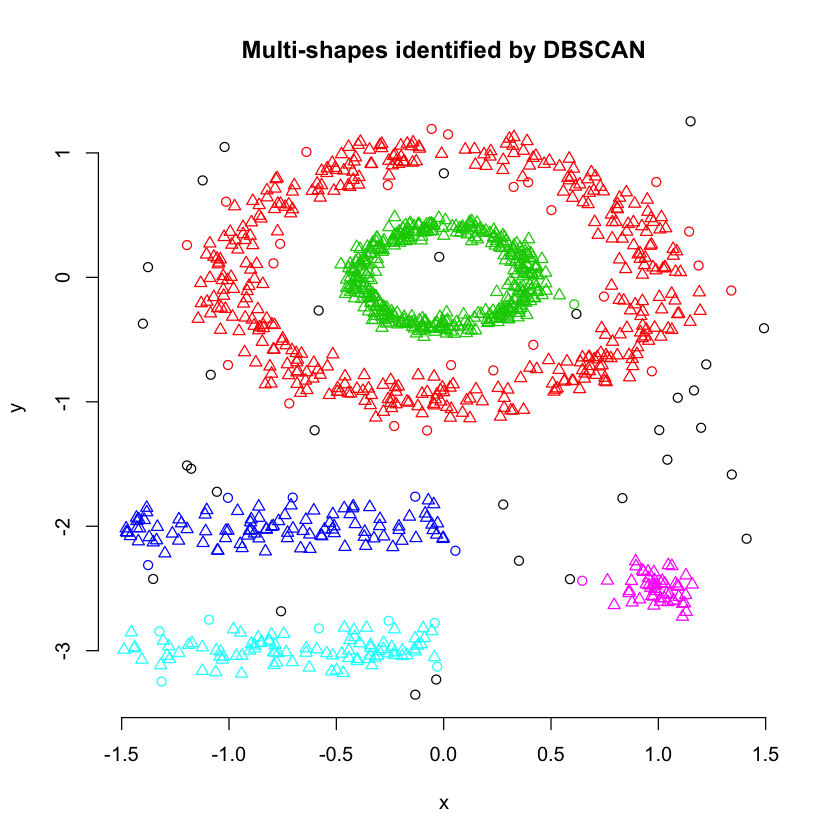

In [5]:
# Plot DBSCAN results
plot(db,df, main = "Multi-shapes identified by DBSCAN", frame = FALSE)

#### Example 2

In [6]:
head(wine)
table(wine$Type)

Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450



 1  2  3 
59 71 48 

In [7]:
wn <-wine[,-1]
head(wn)

Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [8]:
wine_PCA <- prcomp(wn)
head(wine_PCA)
wine_PCA2 <-wine_PCA$x[,1:2]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.0016592647,-1.203406e-03,-0.016873809,0.141446778,0.020336977,-0.194120104,0.923280337,-2.848207e-01,-8.660061e-02,2.245000e-03,-0.0149715080,-1.565141e-02,8.029245e-03
Malic,0.0006810156,-2.154982e-03,-0.122003373,0.160389543,-0.612883454,-0.742472963,-0.150109941,6.467447e-02,-1.566214e-02,1.850935e-02,-0.0231876506,6.729555e-02,-1.109039e-02
Ash,-0.0001949057,-4.593693e-03,-0.051987430,-0.009772810,0.020175575,-0.041752912,0.045009549,1.493395e-01,-7.364985e-02,8.679965e-02,0.9540106426,-1.320630e-01,-1.736857e-01
Alcalinity,0.0046713006,-2.645039e-02,-0.938593003,-0.330965260,0.064352340,0.024065303,0.031526583,-1.515391e-02,-2.044578e-03,-3.554028e-03,-0.0528216953,5.393806e-03,1.939563e-03
Magnesium,-0.0178680075,-9.993442e-01,0.029780248,-0.005393756,-0.006149345,0.001923782,0.001797363,3.552212e-03,1.963668e-03,4.051542e-05,-0.0030248882,6.208885e-04,2.284536e-03
Phenols,-0.0009898297,-8.779622e-04,0.040484644,-0.074584656,0.315245063,-0.278716809,-0.020185710,1.772379e-01,-2.556729e-01,-8.471951e-01,0.0088016070,3.882903e-03,-2.669144e-02
Flavanoids,-0.0015672883,5.185073e-05,0.085443339,-0.169086724,0.524761088,-0.433597955,-0.038868518,2.481166e-01,-3.783067e-01,5.201384e-01,-0.1332046120,-3.748803e-02,6.959853e-02
Nonflavanoids,0.0001230867,1.354479e-03,-0.013510780,0.010805561,-0.029647512,0.021952834,-0.004665483,-6.497968e-03,-3.675204e-02,-3.771319e-02,0.1991789841,1.475524e-01,9.664662e-01
Proanthocyanins,-0.0006006078,-5.004400e-03,0.024659382,-0.050120952,0.251182529,-0.241884488,-0.309799487,-8.704332e-01,5.152017e-02,-9.722752e-03,0.1356214601,-1.311883e-02,-1.760357e-02
Color,-0.0023271432,-1.510035e-02,-0.291398464,0.878893693,0.331747051,-0.002739609,-0.112836514,8.128692e-02,9.902908e-02,2.314712e-02,-0.0098196717,5.035557e-02,-4.632943e-03


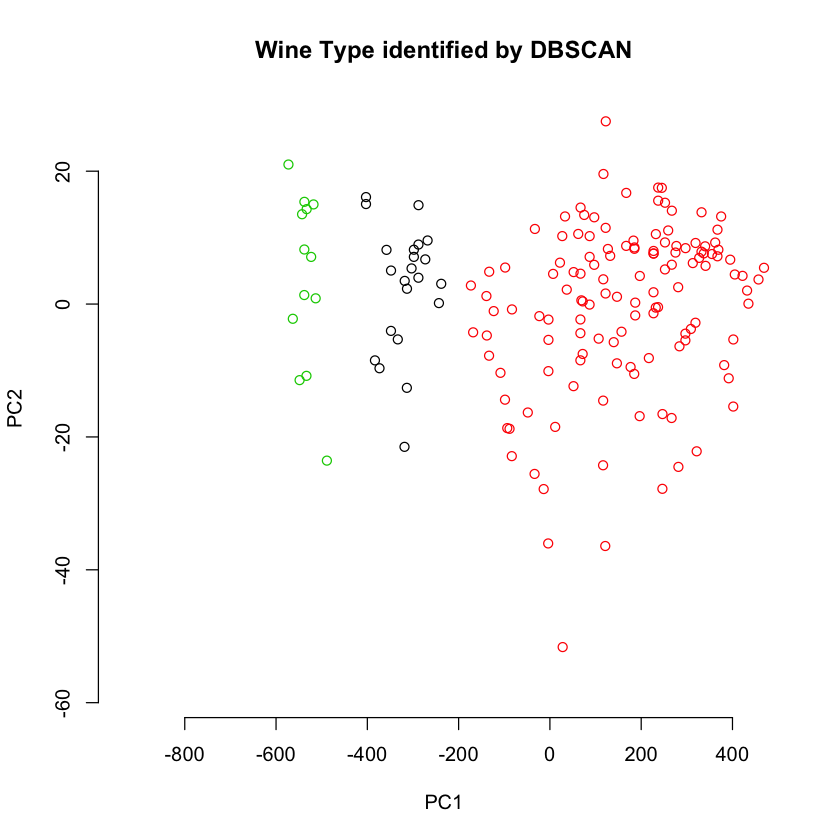

In [9]:
# Compute DBSCAN using fpc package
set.seed(1)
modl <- fpc::dbscan(wn, eps = 50, MinPts = 10)
plot(wine_PCA2, main = "Wine Type identified by DBSCAN", type="p", col=modl$cluster, frame = FALSE)

In [10]:
table(wine$Type,modl$cluster)

   
     0  1  2  3
  1 11 22 13 13
  2  2  0 69  0
  3  0  0 48  0

In [11]:
wine_with_cluster = wine
wine_with_cluster['dbscan_cluster'] = modl$cluster

In [12]:
head(wine_with_cluster)

Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,dbscan_cluster
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0


### Generate the means by cluster in order to give the characteristics of each cluster

* You will describe each cluster. 

In [28]:
wine_with_cluster %>% group_by(dbscan_cluster) %>%
  summarise(count   = n(),
            Alcohol =mean(Alcohol),
            Malic   =mean(Malic), 
            Ash     =mean(Ash),
            Alcalinity =mean(Alcalinity),
            Magnesium  =mean(Magnesium),
            Phenols    =mean(Phenols),
            Flavanoids =mean(Flavanoids),
            Nonflavanoids =mean(Nonflavanoids),
            Proanthocyanins =mean(Proanthocyanins),
            Color =mean(Color), 
            Hue   =mean(Hue),
            Dilution  =mean(Dilution),
            Proline   =mean(Proline)
 )

dbscan_cluster,count,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,13,13.74154,1.820000,2.458462,17.59231,114.23077,3.158462,3.217692,0.2900000,2.183077,6.120000,1.090769,3.091538,1309.1538
1,22,13.76455,1.995000,2.339545,16.41364,102.90909,2.753182,2.919545,0.2759091,1.886364,5.195909,1.051364,3.169545,1065.0000
2,130,12.71408,2.506385,2.346231,20.39231,97.17692,2.086692,1.671308,0.3898462,1.462385,4.844000,0.912200,2.429923,583.3692
3,13,13.83231,1.730000,2.523077,17.63846,105.53846,2.740769,2.913846,0.2992308,1.783846,5.903846,1.117692,3.005385,1281.5385
